# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [1]:
# for data manipulation
import numpy as np
import pandas as pd
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for linear regression machine learning algorithm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Load the dataset

In [20]:
# Let us first access the drive
from google.colab import drive
drive.mount('/content/drive')
# Then let us load the data set
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boston.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Check the shape of the dataset

In [4]:
df.shape

(506, 13)

### Get the info regarding column datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### Get summary statistics for the numerical columns

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

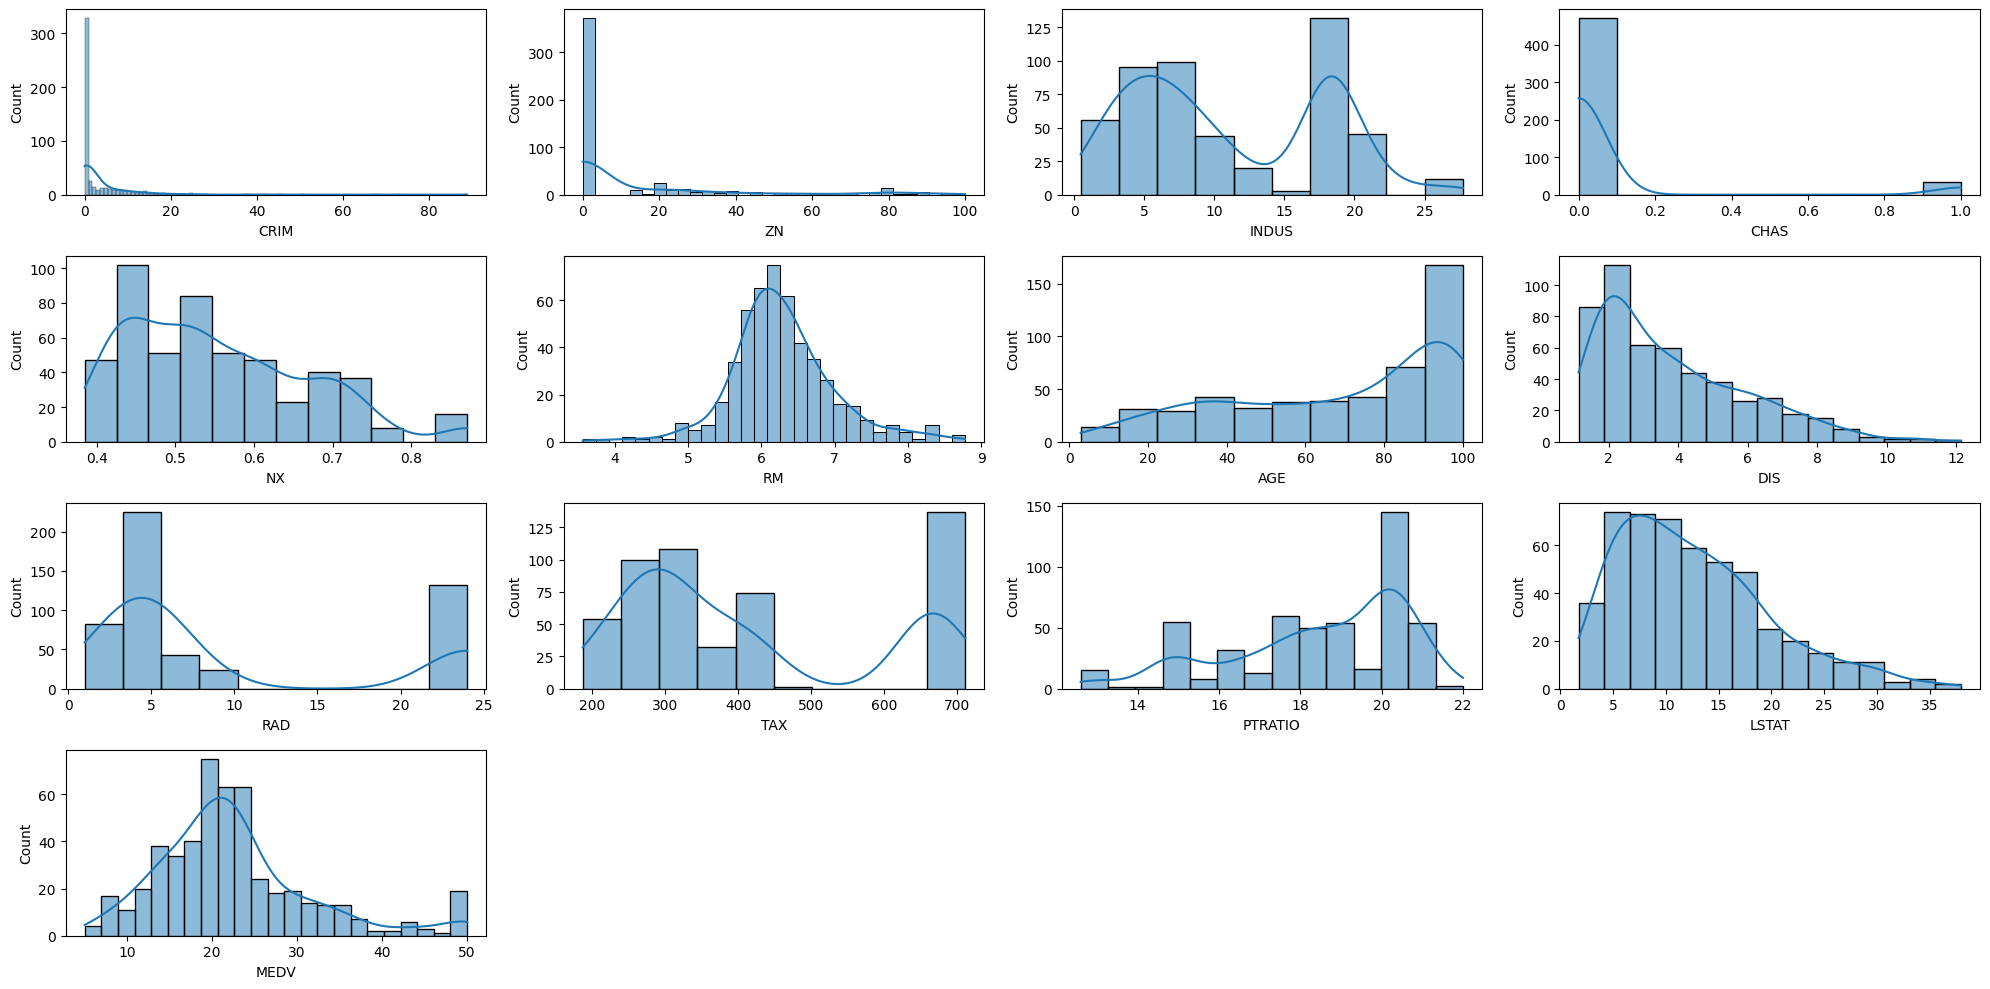

In [19]:
# First univariate plots
figure=plt.figure(figsize=(20,10))
columns = df.columns
for i, column_name in enumerate(columns): # unpack the tuple into index and column_name
    plt.subplot(4,4, i + 1)  # use index + 1 to specify subplot location
    sns.histplot(df[column_name], kde=True)  # access the column using column_name
plt.tight_layout()
plt.show()

* We can notice that ZN,DIS,LSTAT and CRIM looks as right skewed.
* RM and MEDV as normaly distributed.
* AGE as left skewed.

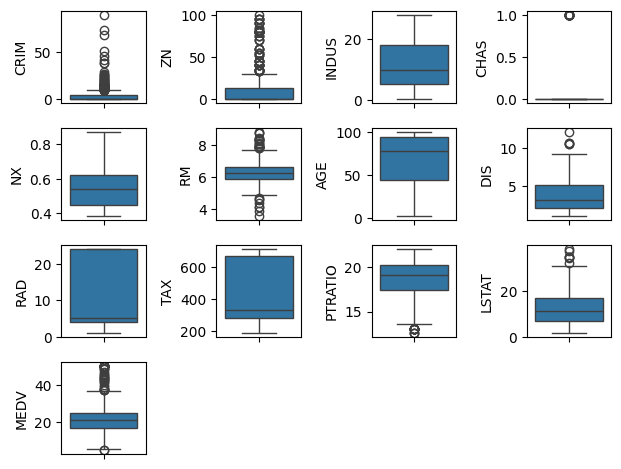

In [23]:
# Let us plot the boxplot
columns = df.columns
for i, column_name in enumerate(columns): # unpack the tuple into index and column_name
    plt.subplot(4,4, i + 1)  # use index + 1 to specify subplot location
    sns.boxplot(df[column_name])  # access the column using column_name
plt.tight_layout()
plt.show()

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

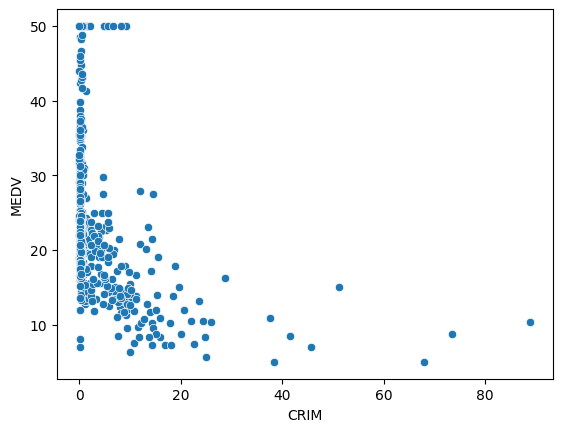

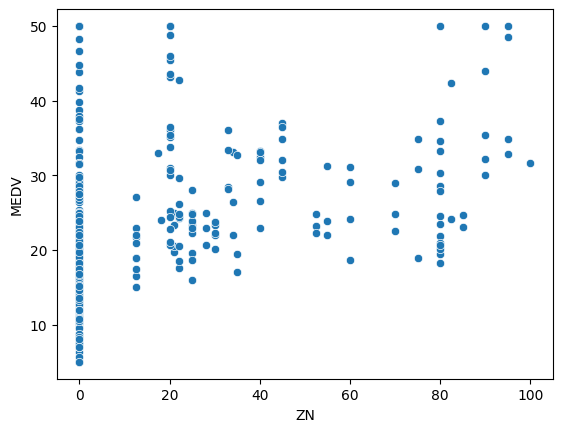

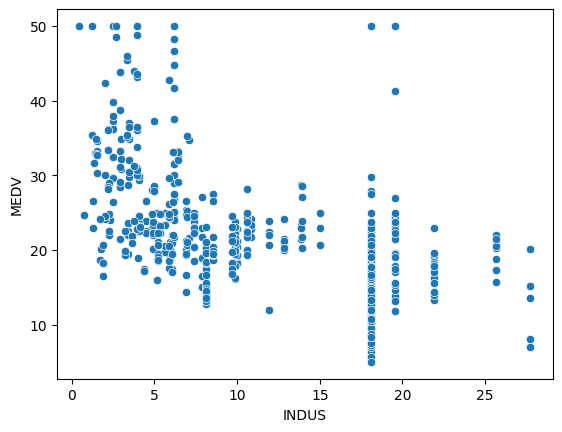

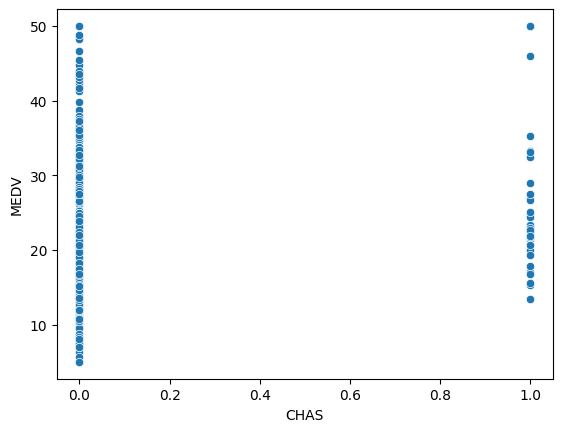

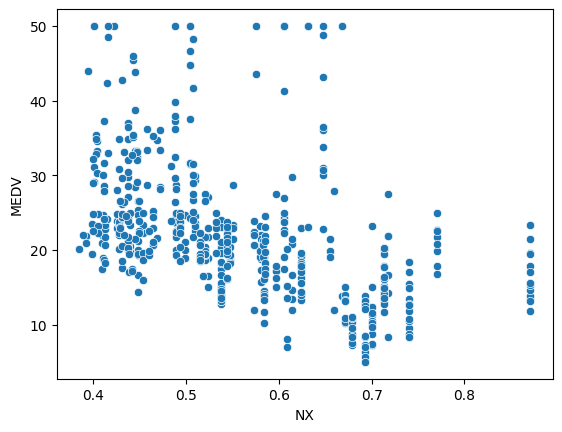

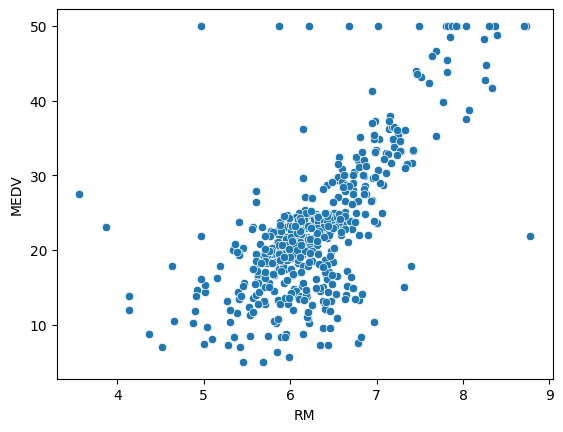

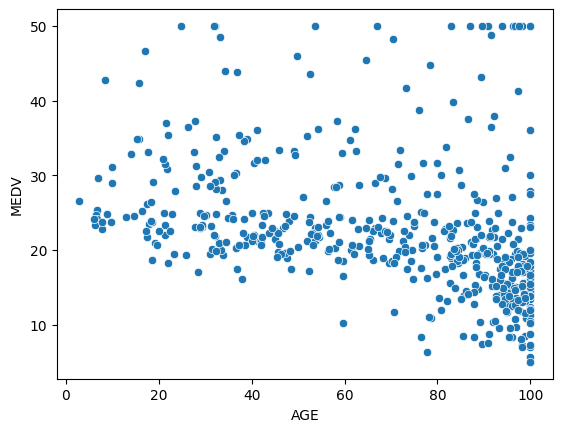

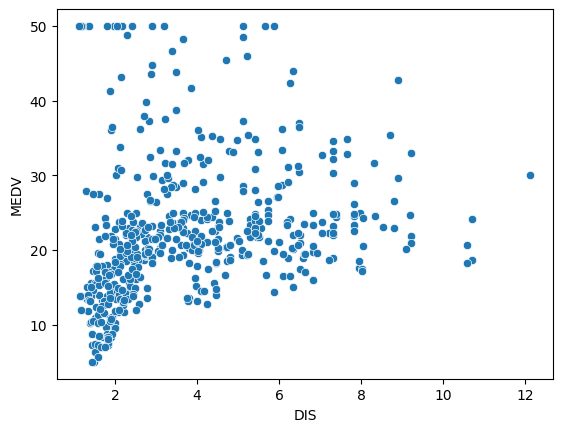

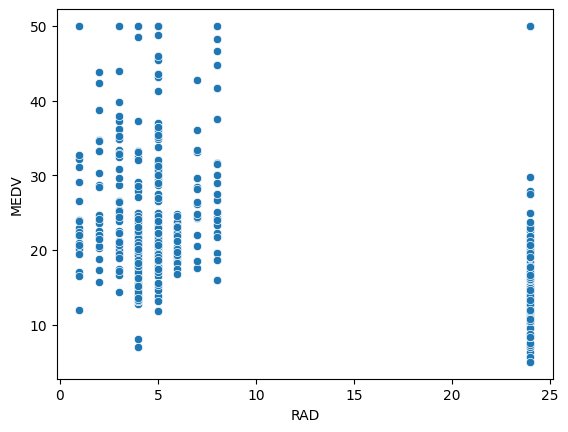

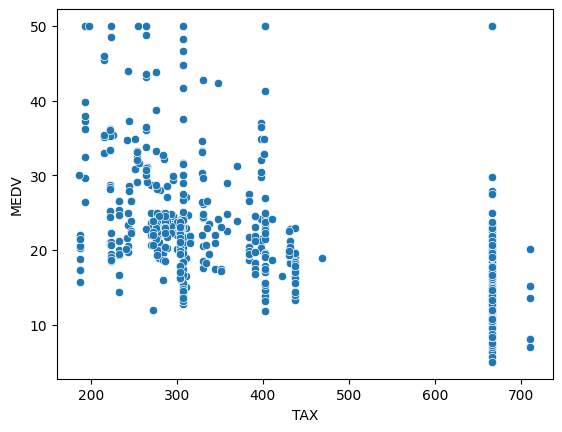

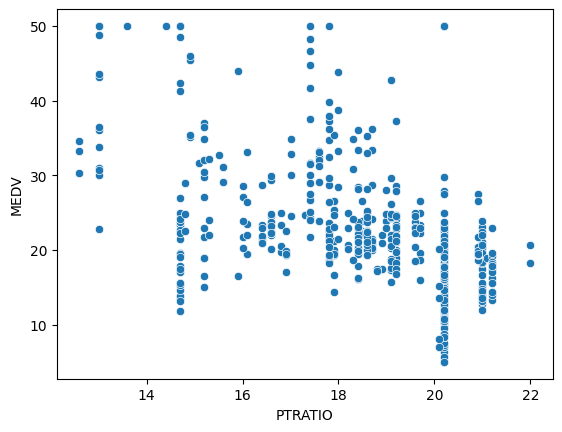

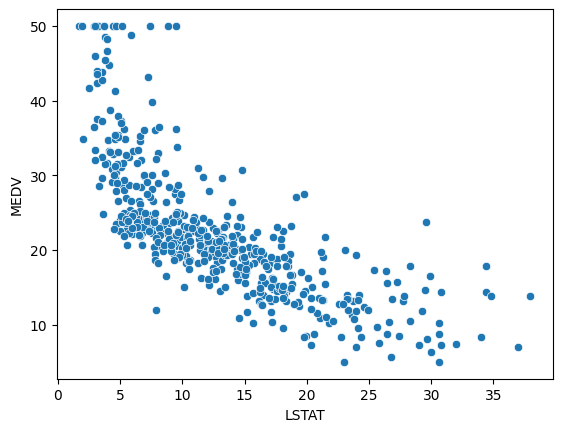

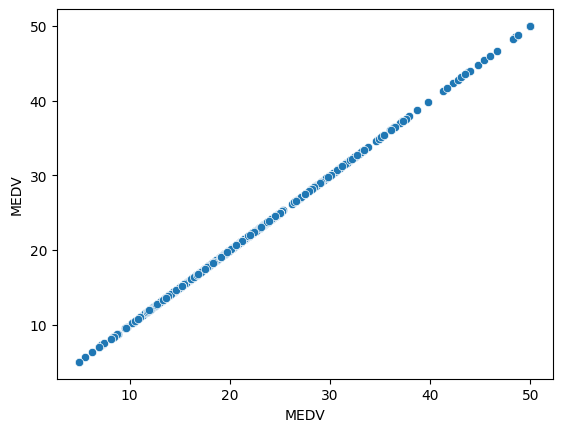

In [24]:
# Second bivariate
# let us try scatter plot
# lets take 'MEDV' as dependent variable against all other features.
# First univariate plots
columns = df.columns
for i in columns:
    sns.scatterplot(x=df[i], y=df['MEDV'])
    plt.show()



* Observatiob:
* it seems whenever increase the CRIM the MEDV decrease.
* and the relatonship between RM nd MEDV is positive.
* and between LSTAT and MEDV is negative.
* and with the other features is not very obvious.

**Plot the correlation heatmap and list your observations.**

<Axes: >

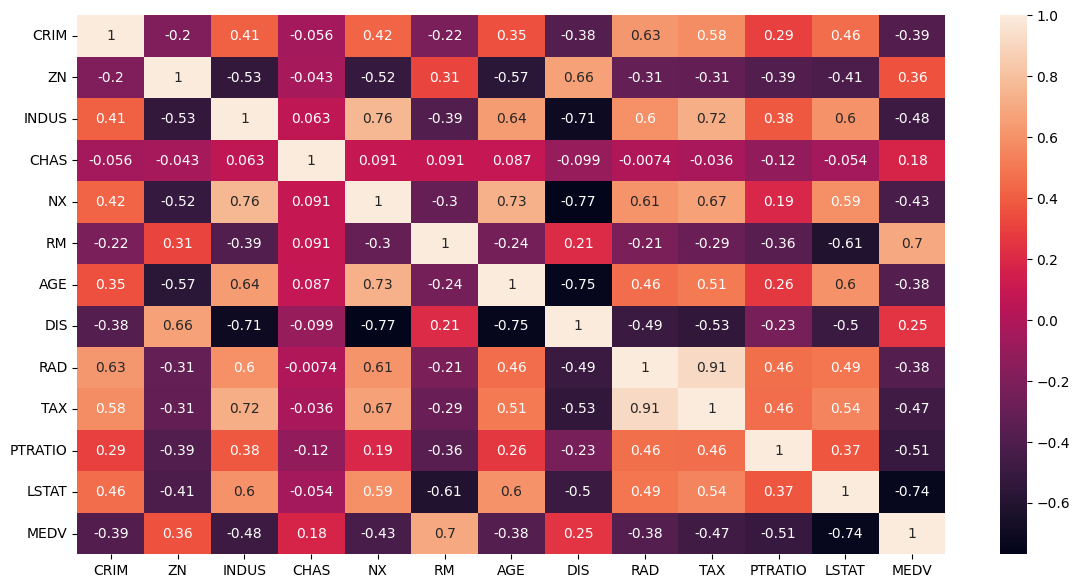

In [26]:
# Let us then check the correlation between the dependent and independents variables.
figure=plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True)

* we can notice that there is high positive correlation between the MEDV and RM which is 0.7.
* and also high negative correlation between MEDV and LSTAT which is -0.74.

### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [31]:
# Let us define x and y forthe model
x=df.drop('MEDV',axis=1)
y=df['MEDV']

In [32]:
# then spliit the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### Model Building

**Fit the model to the training set**

In [39]:
# First build the model
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
# Then find the coffiecients and the intercept
print('Coefficients: ', lin_reg.coef_)
print('Intercept: ', lin_reg.intercept_)
print('')
#or the equation
equation = 'MEDV = ('+str(lin_reg.coef_[0])+") * "+x_train.columns.tolist()[0]
for i in range(1, len(lin_reg.coef_)):
    equation += ' + ('+str(lin_reg.coef_[i])+") * "+x_train.columns.tolist()[i]
equation += ' + '+str(lin_reg.intercept_)
equation

Coefficients:  [-1.39806261e-01  3.61191791e-02  3.62981883e-02  3.46492251e+00
 -1.59831769e+01  3.89980705e+00 -8.87065929e-03 -1.38856394e+00
  2.19830162e-01 -9.20022754e-03 -8.90506364e-01 -5.73644177e-01]
Intercept:  37.57987443867426



'MEDV = (-0.1398062608938118) * CRIM + (0.03611917908428835) * ZN + (0.036298188316487956) * INDUS + (3.464922509862706) * CHAS + (-15.983176944901988) * NX + (3.899807050842811) * RM + (-0.008870659291420868) * AGE + (-1.3885639388972484) * DIS + (0.21983016204780434) * RAD + (-0.009200227539670737) * TAX + (-0.8905063641345782) * PTRATIO + (-0.5736441765420512) * LSTAT + 37.57987443867426'

**Get the score on training set**

In [40]:
# Find trainig score
lin_reg.score(x_train,y_train)

0.7340777261931662

**Write your own function for the R-squared score.**

In [43]:
# create R2 function
def R_squared(model,x,y):
  y_avg=y.mean()
  y_pred=model.predict(x)
  N=np.sum((y-y_pred)**2)
  D=np.sum((y-y_avg)**2)
  r2=1-(N/D)
  return r2
# let us apply for above model and see oif the same result
R_squared(lin_reg,x_train,y_train)

0.7340777261931662

**Get the score on test set**

In [44]:
lin_reg.score(x_test,y_test)

0.7166209449097798

* The test score very close to the train score so we can conculde that the model is generlize well.

**Get the RMSE on test set**

In [45]:
rmse=-np.sqrt(mean_squared_error(y_test,lin_reg.predict(x_test)))
rmse

-4.595155124026766

**Get the model coefficients.**

In [47]:
for i in range(len(lin_reg.coef_)):
  print(x_train.columns[i],":",lin_reg.coef_[i])

CRIM : -0.1398062608938118
ZN : 0.03611917908428835
INDUS : 0.036298188316487956
CHAS : 3.464922509862706
NX : -15.983176944901988
RM : 3.899807050842811
AGE : -0.008870659291420868
DIS : -1.3885639388972484
RAD : 0.21983016204780434
TAX : -0.009200227539670737
PTRATIO : -0.8905063641345782
LSTAT : -0.5736441765420512


**Automate the equation of the fit**

In [52]:
equation = 'MEDV = '+ str(lin_reg.intercept_)
equation += ' ('+str(lin_reg.coef_[0])+") * "+x_train.columns.tolist()[0]
for i in range(1, len(lin_reg.coef_)):
    equation += ' + ('+str(lin_reg.coef_[i])+") * "+x_train.columns.tolist()[i]

equation

'MEDV = 37.57987443867426 (-0.1398062608938118) * CRIM + (0.03611917908428835) * ZN + (0.036298188316487956) * INDUS + (3.464922509862706) * CHAS + (-15.983176944901988) * NX + (3.899807050842811) * RM + (-0.008870659291420868) * AGE + (-1.3885639388972484) * DIS + (0.21983016204780434) * RAD + (-0.009200227539670737) * TAX + (-0.8905063641345782) * PTRATIO + (-0.5736441765420512) * LSTAT'